In [76]:
import numpy as np
from queue import PriorityQueue
import heapq
from scipy.spatial import distance
import networkx as nx
import matplotlib.pyplot as plt 

In [62]:
class No():
    """A No class for A* Pathfinding"""

    def __init__(self, pai=None, coordenada=None):
        self.pai = pai
        self.coordenada = coordenada

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.coordenada == other.coordenada


def calcular_h_score(coordenada, destino):
    """Calcula o h-score usando a distância Euclidiana"""
    return ((coordenada[0] - destino[0])) + ((coordenada[1] - destino[1]))


def gerar_filhos(matriz, current_no, end_no):
    """Gera os filhos válidos de um nó"""
    children = []
    for new_coordenada in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares
        no_coordenada = (current_no.coordenada[0] + new_coordenada[0], current_no.coordenada[1] + new_coordenada[1])

        if 0 <= no_coordenada[0] < len(matriz) and 0 <= no_coordenada[1] < len(matriz[0]) and matriz[no_coordenada[0]][no_coordenada[1]] == 0:
            novo_no = No(current_no, no_coordenada)
            novo_no.g = current_no.g + 1
            novo_no.h = calcular_h_score(no_coordenada, end_no.coordenada)
            novo_no.f = novo_no.g + novo_no.h
            children.append(novo_no)

    return children


def a_star(matriz, start, end):
    """Executa o algoritmo A*"""
    no_inicial = No(None, start)
    no_final = No(None, end)

    lista_aberta = [no_inicial]
    lista_fechada = []

    while lista_aberta:
        lista_aberta.sort(key=lambda x: x.f) # Ordena a lista aberta pelo f-score
        no_atual = lista_aberta[0]
        lista_aberta.remove(no_atual)
        lista_fechada.append(no_atual)

        if no_atual == no_final:
            path = []
            while no_atual:
                path.append(no_atual.coordenada)
                no_atual = no_atual.pai
            return path[::-1]

        filhos = gerar_filhos(matriz, no_atual, no_final)

        for filho in filhos:
            if filho in lista_fechada:
                continue

            novo_g = no_atual.g + 1
            if filho in lista_aberta:
                if novo_g < filho.g:
                    filho.g = novo_g
                    filho.f = filho.g + filho.h
                    filho.pai = no_atual
            else:
                filho.g = novo_g
                filho.h = calcular_h_score(filho.coordenada, no_final.coordenada)
                filho.f = filho.g + filho.h
                filho.pai = no_atual
                lista_aberta.append(filho)

    return None





In [63]:
#add mais obstaculos

def matriz_obstaculos_objetivos(tam_matriz, num_obstacles, num_objectives):
    
    matriz = np.zeros((tam_matriz,tam_matriz),dtype=int)
    
    linhas, colunas = matriz.shape
    obstaculos_added = 0
    objectives_added = 0

    np.random.seed(99)
    while obstaculos_added < num_obstacles:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 1
            obstaculos_added += 1

    while objectives_added < num_objectives:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 3
            objectives_added += 1
    
    matriz[0,5] = 0
    return matriz

In [64]:
matriz = matriz_obstaculos_objetivos(11, 20, 10)
matriz

array([[0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0],
       [0, 1, 3, 1, 0, 0, 0, 1, 0, 3, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 3, 0, 3, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]])

In [65]:
matriz_sem_objetivos = matriz.copy()
matriz_sem_objetivos[matriz_sem_objetivos == 3] = 0
matriz_sem_objetivos

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [66]:
objetivos = [(linha, coluna) for linha in range(11) for coluna in range(11) if matriz[linha][coluna] == 3]
objetivos

[(0, 2),
 (0, 7),
 (1, 2),
 (1, 9),
 (2, 8),
 (3, 2),
 (5, 5),
 (9, 2),
 (9, 4),
 (10, 3)]

In [71]:
# Pontos de Partida e Pontos de chegada

pontos_partida = [(0,5)] + objetivos[:-1]
pontos_chegada = objetivos 
print(pontos_partida)

[(0, 5), (0, 2), (0, 7), (1, 2), (1, 9), (2, 8), (3, 2), (5, 5), (9, 2), (9, 4)]


In [72]:
for i in range(len(pontos_partida)):
    inicio = pontos_partida[i]
    dest = pontos_chegada[i]
    path = a_star(matriz_sem_objetivos, inicio, dest)
    print(path)


[(0, 5), (0, 4), (0, 3), (0, 2)]
[(0, 2), (0, 3), (0, 4), (0, 5), (1, 6), (0, 7)]
[(0, 7), (1, 6), (0, 5), (0, 4), (0, 3), (1, 2)]
[(1, 2), (0, 3), (0, 4), (0, 5), (1, 6), (0, 7), (0, 8), (1, 9)]
[(1, 9), (2, 8)]
[(2, 8), (2, 7), (1, 6), (0, 5), (1, 4), (2, 3), (3, 2)]
[(3, 2), (4, 3), (4, 4), (5, 5)]
[(5, 5), (6, 4), (7, 3), (8, 2), (9, 2)]
[(9, 2), (8, 3), (9, 4)]
[(9, 4), (10, 3)]


In [ ]:
def exibir_labirinto_com_caminho(problema):

    #executa o algoritmo A* para encontrar o melhor caminho
    caminho = a_star(problema)

    #converte o mapa para um array numpy para plotagem
    mapa_array = np.array(problema.mapa)
    n_linhas, n_colunas = mapa_array.shape

    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    plt.imshow(mapa_array, cmap='binary')

    #caminho percorrido pelo algoritmo A*
    if caminho:
        caminho_array = np.array(caminho)
        plt.plot(caminho_array[:, 1], caminho_array[:, 0], color='red', linewidth=3)

    #posição inicial (círculo verde)
    plt.scatter(problema.inicio[1], problema.inicio[0], color='green', s=100, marker='o', zorder=5)

    #destino final (círculo vermelho)
    plt.scatter(problema.fim[1], problema.fim[0], color='red', s=100, marker='o', zorder=5)

    plt.title('Mapa com Caminho A*')
    plt.show()

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def exibir_labirinto_com_caminho(mapa, caminho, inicio, fim, cor_caminho='red'):
    # Converte o mapa para um array numpy para plotagem

    n_linhas, n_colunas = mapa.shape


    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    plt.imshow(mapa, cmap='binary')

    # Caminho percorrido pelo algoritmo A*
    if caminho:
        caminho_array = np.array(caminho)
        plt.plot(caminho_array[:, 1], caminho_array[:, 0], color=cor_caminho, linewidth=3)

    # Posição inicial (círculo verde)
    plt.scatter(inicio[1], inicio[0], color='green', s=100, marker='o', zorder=5, label='Ponto de Partida')

    # Destino final (círculo vermelho)
    plt.scatter(fim[1], fim[0], color='red', s=100, marker='o', zorder=5, label='Ponto de Chegada')

    plt.legend()
    plt.title('Mapa com Caminho A*')
    plt.show()


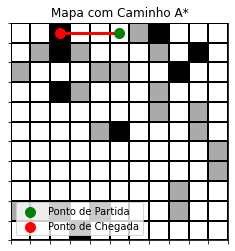

In [90]:
inicio = pontos_partida[0]
dest = pontos_chegada[0]
path = a_star(matriz_sem_objetivos, inicio, dest)
exibir_labirinto_com_caminho(matriz, path, inicio, dest)